# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier

#Readout Mit Functions
#from ReadoutMit import prepare_circuit, modify_counts, symmetry

# Expectation Value/Running Functions
from Result_ReadoutMit3 import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, prepare_circuit_normal, prepare_circuit, modify_counts, symmetry, evaluator

# Restricted Range Info

In [3]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = generateNoiseModel(machine, coherent = True, incoherent = True, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


# Variational Form
For Hydrogen

In [6]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

# Running Circuits for different Param

In [7]:
def circs(circuits):
    '''
    Gives copy of list of circuits
    '''
    n_circuits = [circ.copy() for circ in circuits ]
    return n_circuits

In [8]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 8192
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    circs_nr = circs(circuits)
    circs_r = circs(circuits)
    circs_ideal = circs(circuits)
    #print('no mit')
    noisy_r = evaluator(circs_r, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = False)
    print('mit')
    noisy_nr = evaluator(circs_nr, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator, readout_mit = True)
    print(noisy_nr)
    #print('no mit')
    ideal = evaluator(circs_ideal, samples, None, Hamiltonian, Hamiltonian_weights, simulator, False)
    #print('done')
    
    return noisy_r, noisy_nr, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    diff_r = []
    diff_nr = []
    params = []
    
    for i in range(1000):
        print(i)
    
        p1,p2,p3 = [ 0.00172129,-0.00182397, -0.11217598]


        noisy_r,noisy_nr, ideal = EnergyFinder([p1,p2,p3])
        energies.append([[p1,p2,p3], ideal, noisy_r, noisy_nr])
        diff_r.append(noisy_r-ideal)
        diff_nr.append(noisy_nr-ideal)
        
        print('Noisy diff is ' + str(noisy_r-ideal))
        print('Mitigated diff is ' + str(noisy_nr-ideal))
        
    return energies, diff_r, diff_nr
energies, diff_r, diff_nr = main()

0
mit
-1.0321017659250236
Noisy diff is 0.08846435546874987
Mitigated diff is 0.06412446140014483
1
mit
-1.0418590308822886
Noisy diff is 0.10846069335937503
Mitigated diff is 0.05928882730225493
2
mit
-1.0402111676344254
Noisy diff is 0.09716333007812517
Mitigated diff is 0.05642887805011809
3
mit
-1.0459325351557927
Noisy diff is 0.10418139648437497
Mitigated diff is 0.050076895294375756
4
mit
-1.0453860150092724
Noisy diff is 0.09974169921875009
Mitigated diff is 0.05268884512839622
5
mit
-1.0453750259982835
Noisy diff is 0.10192895507812483
Mitigated diff is 0.05487756851438497
6
mit
-1.0371296047528622
Noisy diff is 0.09657202148437483
Mitigated diff is 0.06041864405668118
7
mit
-1.0367577930473832
Noisy diff is 0.08957666015624999
Mitigated diff is 0.055680104199660185
8
mit
-1.0352392506625083
Noisy diff is 0.09768212890624994
Mitigated diff is 0.06125260166266022
9
mit
-1.0476346108578685
Noisy diff is 0.10512133789062506
Mitigated diff is 0.0550000637329251
10
mit
-1.040193829

Noisy diff is 0.09420214843749997
Mitigated diff is 0.06319299331311035
84
mit
-1.0473652579885155
Noisy diff is 0.09671240234375
Mitigated diff is 0.05046009043040289
85
mit
-1.0341032311264886
Noisy diff is 0.08712402343749992
Mitigated diff is 0.059327586042429825
86
mit
-1.0444224008456584
Noisy diff is 0.09990185546875008
Mitigated diff is 0.05421398272951006
87
mit
-1.0413112897345473
Noisy diff is 0.108367919921875
Mitigated diff is 0.05891225204374617
88
mit
-1.0487081151313726
Noisy diff is 0.10149829101562502
Mitigated diff is 0.046000045787545796
89
mit
-1.0402321688554264
Noisy diff is 0.10248510742187511
Mitigated diff is 0.05649747643849223
90
mit
-1.0413278953511529
Noisy diff is 0.09795263671874999
Mitigated diff is 0.05220692572401564
91
mit
-1.0390386576218127
Noisy diff is 0.09839697265624991
Mitigated diff is 0.06105280407835578
92
mit
-1.0477200809433387
Noisy diff is 0.0994387207031251
Mitigated diff is 0.05071659560057973
93
mit
-1.0396724346397634
Noisy diff is 

mit
-1.0390159442257936
Noisy diff is 0.09584423828125
Mitigated diff is 0.05597712880249994
167
mit
-1.0396275290507864
Noisy diff is 0.0986616210937501
Mitigated diff is 0.0558115888993822
168
mit
-1.0490324130556707
Noisy diff is 0.09896484374999992
Mitigated diff is 0.04833541583199774
169
mit
-1.0491190093131058
Noisy diff is 0.09898095703124987
Mitigated diff is 0.04768949340268769
170
mit
-1.0448441346673922
Noisy diff is 0.09736059570312494
Mitigated diff is 0.046818616095276155
171
mit
-1.0454887736310934
Noisy diff is 0.08911914062499982
Mitigated diff is 0.050995266194074906
172
mit
-1.041770630393888
Noisy diff is 0.09779565429687476
Mitigated diff is 0.05222634888440525
173
mit
-1.0384067720300294
Noisy diff is 0.09720874023437487
Mitigated diff is 0.05968786349826405
174
mit
-1.0376499954732532
Noisy diff is 0.09557983398437497
Mitigated diff is 0.06240875138316526
175
mit
-1.0344001786234363
Noisy diff is 0.09291235351562488
Mitigated diff is 0.06095373424860728
176
mit


mit
-1.0327237439470014
Noisy diff is 0.0994104003906251
Mitigated diff is 0.06602958298754213
250
mit
-1.0375000082140704
Noisy diff is 0.09386425781250018
Mitigated diff is 0.05954555504859815
251
mit
-1.042004587527784
Noisy diff is 0.09734716796874987
Mitigated diff is 0.05019209878175945
252
mit
-1.0460881142099185
Noisy diff is 0.11095629882812474
Mitigated diff is 0.05645085725587484
253
mit
-1.0422834982616955
Noisy diff is 0.09222851562499979
Mitigated diff is 0.0538589888290979
254
mit
-1.0424783227015801
Noisy diff is 0.08761254882812519
Mitigated diff is 0.051783793295463454
255
mit
-1.0392165400397977
Noisy diff is 0.09661035156249986
Mitigated diff is 0.05949723611349578
256
mit
-1.0381911432144006
Noisy diff is 0.09639697265624991
Mitigated diff is 0.057851002079517766
257
mit
-1.0417024749377242
Noisy diff is 0.09530151367187478
Mitigated diff is 0.05018024652806918
258
mit
-1.0433540247772823
Noisy diff is 0.09513647460937502
Mitigated diff is 0.05083997598538614
259
m

Noisy diff is 0.09868994140624965
Mitigated diff is 0.0643612547337642
332
mit
-1.0365730723963298
Noisy diff is 0.09174365234374982
Mitigated diff is 0.06025984438196352
333
mit
-1.0446111676344254
Noisy diff is 0.09885546875000006
Mitigated diff is 0.051981026487618154
334
mit
-1.044803597426855
Noisy diff is 0.09879394531249996
Mitigated diff is 0.050860129898313566
335
mit
-1.0340465766698341
Noisy diff is 0.09525659179687507
Mitigated diff is 0.06429342018658435
336
mit
-1.0422861371093948
Noisy diff is 0.10041284179687504
Mitigated diff is 0.057512111700148694
337
mit
-1.0384473766351232
Noisy diff is 0.09801953124999985
Mitigated diff is 0.061202190533795164
338
mit
-1.0461389140633803
Noisy diff is 0.0891599121093749
Mitigated diff is 0.049742098418038116
339
mit
-1.042215074838332
Noisy diff is 0.09115014648437492
Mitigated diff is 0.05630119154933633
340
mit
-1.0410743152112618
Noisy diff is 0.09303295898437502
Mitigated diff is 0.056674617192031596
341
mit
-1.037787222770182

mit
-1.0411777998518938
Noisy diff is 0.10353344726562486
Mitigated diff is 0.055868251692024584
415
mit
-1.0407266743499317
Noisy diff is 0.10015551757812502
Mitigated diff is 0.0641819260221117
416
mit
-1.042143798664675
Noisy diff is 0.1015205078125
Mitigated diff is 0.05289395209799341
417
mit
-1.0430128770361347
Noisy diff is 0.09500341796874989
Mitigated diff is 0.05010763739840862
418
mit
-1.0459506126834806
Noisy diff is 0.09133154296875023
Mitigated diff is 0.05181492128231313
419
mit
-1.0401371749604325
Noisy diff is 0.09507690429687488
Mitigated diff is 0.05509710900536091
420
mit
-1.0515713629946206
Noisy diff is 0.09184643554687488
Mitigated diff is 0.04477962018992265
421
mit
-1.0351713629946204
Noisy diff is 0.09103784179687491
Mitigated diff is 0.052537286205547984
422
mit
-1.0430714850947427
Noisy diff is 0.08790747070312488
Mitigated diff is 0.055095904339800716
423
mit
-1.0317303373535949
Noisy diff is 0.09701928710937491
Mitigated diff is 0.06603470833094849
424
mit

Noisy diff is 0.09339843749999988
Mitigated diff is 0.052348635137648536
497
mit
-1.034832542862515
Noisy diff is 0.09472802734374985
Mitigated diff is 0.06192859657202843
498
mit
-1.040003610607525
Noisy diff is 0.095578857421875
Mitigated diff is 0.05653243117076845
499
mit
-1.0393891277646872
Noisy diff is 0.09953833007812507
Mitigated diff is 0.05936371088860626
500
mit
-1.0373315583548157
Noisy diff is 0.09552246093749983
Mitigated diff is 0.06134950295472774
501
mit
-1.0473779564012138
Noisy diff is 0.09326147460937495
Mitigated diff is 0.05076379826770472
502
mit
-1.039477101700359
Noisy diff is 0.09061450195312482
Mitigated diff is 0.05523472132793428
503
mit
-1.0408887003620737
Noisy diff is 0.09792944335937515
Mitigated diff is 0.059519411728719884
504
mit
-1.0404119002351577
Noisy diff is 0.094466064453125
Mitigated diff is 0.05952257904313574
505
mit
-1.0399860260428653
Noisy diff is 0.09287280273437482
Mitigated diff is 0.054846402454178156
506
mit
-1.0412213417102238
Nois

mit
-1.0452614728847303
Noisy diff is 0.09716748046875001
Mitigated diff is 0.05175650248731323
580
mit
-1.0366002646556385
Noisy diff is 0.09803173828125011
Mitigated diff is 0.06306907790390492
581
mit
-1.0469335119567695
Noisy diff is 0.10103198242187483
Mitigated diff is 0.053001455602773806
582
mit
-1.04222683688668
Noisy diff is 0.09088671874999998
Mitigated diff is 0.05294299395411328
583
mit
-1.0448733193244855
Noisy diff is 0.09307763671875002
Mitigated diff is 0.05082312284443291
584
mit
-1.0404483535553821
Noisy diff is 0.09399536132812503
Mitigated diff is 0.05580228783228636
585
mit
-1.0421481639714214
Noisy diff is 0.0952705078124998
Mitigated diff is 0.05358416686937195
586
mit
-1.0420465766698341
Noisy diff is 0.09451806640625016
Mitigated diff is 0.05718502174908435
587
mit
-1.040537907561165
Noisy diff is 0.10355517578124984
Mitigated diff is 0.05661580999837845
588
mit
-1.043612667389435
Noisy diff is 0.0861843261718751
Mitigated diff is 0.04896976110760831
589
mit
-

mit
-1.0449320467553043
Noisy diff is 0.0986315917968752
Mitigated diff is 0.050659903226114356
663
mit
-1.0380077488310062
Noisy diff is 0.09552661132812501
Mitigated diff is 0.06086203318166228
664
mit
-1.0439591529824104
Noisy diff is 0.09545971679687493
Mitigated diff is 0.050635726686508065
665
mit
-1.043711289734547
Noisy diff is 0.09871386718750008
Mitigated diff is 0.0536243125906215
666
mit
-1.0417432799665376
Noisy diff is 0.08683325195312475
Mitigated diff is 0.048233191499255756
667
mit
-1.0458202030434605
Noisy diff is 0.09196752929687502
Mitigated diff is 0.046039080922333
668
mit
-1.0436646192776922
Noisy diff is 0.09630761718749992
Mitigated diff is 0.05522542640685124
669
mit
-1.0437344887577462
Noisy diff is 0.0945866699218747
Mitigated diff is 0.04957059598929714
670
mit
-1.046547675570933
Noisy diff is 0.09050927734375014
Mitigated diff is 0.05007308300423552
671
mit
-1.0465237439470014
Noisy diff is 0.09893383789062504
Mitigated diff is 0.04924862595629209
672
mit


Noisy diff is 0.09640893554687513
Mitigated diff is 0.05805113836900966
745
mit
-1.0482050626283204
Noisy diff is 0.10316918945312492
Mitigated diff is 0.04819426039997299
746
mit
-1.044015822110761
Noisy diff is 0.09203735351562492
Mitigated diff is 0.05186934076128247
747
mit
-1.0382036350305317
Noisy diff is 0.09726513671874981
Mitigated diff is 0.05584583448213665
748
mit
-1.0422968819201395
Noisy diff is 0.08924218750000001
Mitigated diff is 0.05374062470190388
749
mit
-1.04507539229865
Noisy diff is 0.09983178710937501
Mitigated diff is 0.0489377002608935
750
mit
-1.0369712501239496
Noisy diff is 0.09143212890625008
Mitigated diff is 0.05930697915434391
751
mit
-1.0427347329579906
Noisy diff is 0.0937958984374998
Mitigated diff is 0.050321816632802774
752
mit
-1.0402858929091505
Noisy diff is 0.09717285156249988
Mitigated diff is 0.056426418400392864
753
mit
-1.0386833028776437
Noisy diff is 0.09635351562500005
Mitigated diff is 0.05516450647877491
754
mit
-1.044112510735768
Nois

mit
-1.0404895559128136
Noisy diff is 0.09758959960937474
Mitigated diff is 0.061642921412354834
828
mit
-1.0439596413828989
Noisy diff is 0.09574072265625011
Mitigated diff is 0.051976302739144664
829
mit
-1.042512341832339
Noisy diff is 0.10131152343750016
Mitigated diff is 0.060496112055329565
830
mit
-1.0451667231899806
Noisy diff is 0.09993286132812507
Mitigated diff is 0.051577814682062906
831
mit
-1.040676857500115
Noisy diff is 0.09009716796875011
Mitigated diff is 0.05029814912192854
832
mit
-1.0449482924978657
Noisy diff is 0.0946708984375002
Mitigated diff is 0.053821635999177886
833
mit
-1.0470990797223372
Noisy diff is 0.09506787109375003
Mitigated diff is 0.050276073384081243
834
mit
-1.047618005241263
Noisy diff is 0.08916601562500004
Mitigated diff is 0.04872516544328054
835
mit
-1.0457032311264889
Noisy diff is 0.08381909179687508
Mitigated diff is 0.0434880840893046
836
mit
-1.0471779564012138
Noisy diff is 0.09544995117187516
Mitigated diff is 0.049227958423954776
83

Noisy diff is 0.09688500976562497
Mitigated diff is 0.056855608676262825
910
mit
-1.0459772238004812
Noisy diff is 0.10008203125000015
Mitigated diff is 0.04876682579031244
911
mit
-1.0396419058816733
Noisy diff is 0.09764941406249994
Mitigated diff is 0.056773042146620156
912
mit
-1.040792473716574
Noisy diff is 0.10030346679687496
Mitigated diff is 0.05612931024921952
913
mit
-1.0409445009677585
Noisy diff is 0.09397949218750012
Mitigated diff is 0.05986229276366006
914
mit
-1.050734000357258
Noisy diff is 0.09630639648437489
Mitigated diff is 0.04382914103041036
915
mit
-1.0427740491973068
Noisy diff is 0.09624780273437494
Mitigated diff is 0.05043484414348676
916
mit
-1.0403723397955975
Noisy diff is 0.09558129882812494
Mitigated diff is 0.0540665340139459
917
mit
-1.044500056523314
Noisy diff is 0.09355810546874999
Mitigated diff is 0.047945653223729456
918
mit
-1.0436556120788696
Noisy diff is 0.09805444335937485
Mitigated diff is 0.05549371094942379
919
mit
-1.0484333898566474
N

mit
-1.0375124639473714
Noisy diff is 0.09507446289062504
Mitigated diff is 0.059421282909047024
993
mit
-1.040907750307122
Noisy diff is 0.10439941406249997
Mitigated diff is 0.05765685592429648
994
mit
-1.0429491407723983
Noisy diff is 0.09942919921874993
Mitigated diff is 0.052940172490270054
995
mit
-1.0497828266290175
Noisy diff is 0.1014650878906248
Mitigated diff is 0.050380900696150865
996
mit
-1.043738884362142
Noisy diff is 0.0989838867187498
Mitigated diff is 0.05335550702552627
997
mit
-1.044662787552207
Noisy diff is 0.0972294921875001
Mitigated diff is 0.05288131086671144
998
mit
-1.0435098245330823
Noisy diff is 0.09381518554687474
Mitigated diff is 0.05242318990146111
999
mit
-1.0401987134219708
Noisy diff is 0.09339843749999988
Mitigated diff is 0.05535270921569757


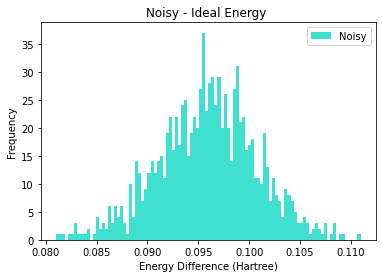

In [9]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
plt.hist(diff_r, bins=100, color = "turquoise", label = 'Noisy')
#plt.hist(diff_nr, bins=100, color = "lightcoral", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_noisy_optimized_3.png', dpi = 1000)


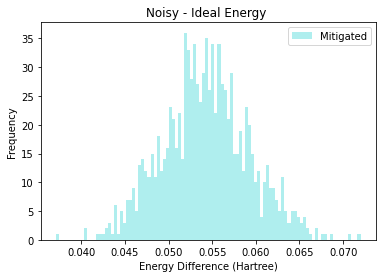

In [10]:
import numpy as np
import matplotlib.pyplot as plt

a = plt.figure()
#plt.hist(diff_r, bins=100, color = "orang", label = 'Noisy')
plt.hist(diff_nr, bins=100, color = "paleturquoise", label = 'Mitigated')
plt.title("Noisy - Ideal Energy ")
plt.xlabel("Energy Difference (Hartree)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
a.savefig('SchnMethod_mitigated_optimized_3.png', dpi = 1000)

# Without Readout

In [11]:
energies

[[[0.00172129, -0.00182397, -0.11217598],
  -1.0962262273251684,
  -1.0077618718564185,
  -1.0321017659250236],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.1011478581845435,
  -0.9926871648251685,
  -1.0418590308822886],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0966400456845435,
  -0.9994767156064184,
  -1.0402111676344254],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0960094304501684,
  -0.9918280339657934,
  -1.0459325351557927],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0980748601376686,
  -0.9983331609189185,
  -1.0453860150092724],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.1002525945126684,
  -0.9983236394345436,
  -1.0453750259982835],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0975482488095434,
  -1.0009762273251686,
  -1.0371296047528622],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0924378972470434,
  -1.0028612370907934,
  -1.0367577930473832],
 [[0.00172129, -0.00182397, -0.11217598],
  -1.0964918523251685,
  -0.9988097234189186,
  -1.03523925066

In [12]:
diff_r

[0.08846435546874987,
 0.10846069335937503,
 0.09716333007812517,
 0.10418139648437497,
 0.09974169921875009,
 0.10192895507812483,
 0.09657202148437483,
 0.08957666015624999,
 0.09768212890624994,
 0.10512133789062506,
 0.09784936523437493,
 0.09370361328124988,
 0.09853002929687504,
 0.0952011718750001,
 0.09698608398437503,
 0.09483325195312498,
 0.09543383789062498,
 0.09378686523437496,
 0.09562915039062503,
 0.09351049804687506,
 0.09067187499999996,
 0.09221118164062492,
 0.10117480468749984,
 0.10113720703125006,
 0.09751904296875002,
 0.09925122070312509,
 0.10387646484375013,
 0.0964650878906248,
 0.0886867675781251,
 0.09894262695312506,
 0.09368603515625007,
 0.0886376953125001,
 0.08146752929687495,
 0.08954321289062483,
 0.09291992187499987,
 0.0917341308593751,
 0.10435375976562489,
 0.09954443359374987,
 0.09901977539062501,
 0.09798071289062471,
 0.09774047851562484,
 0.10260083007812482,
 0.09964965820312488,
 0.09631811523437506,
 0.10196166992187516,
 0.099130126953

In [13]:
diff_nr 

[0.06412446140014483,
 0.05928882730225493,
 0.05642887805011809,
 0.050076895294375756,
 0.05268884512839622,
 0.05487756851438497,
 0.06041864405668118,
 0.055680104199660185,
 0.06125260166266022,
 0.0550000637329251,
 0.05717351118933123,
 0.056123446323641746,
 0.053299230126732544,
 0.05538816052111972,
 0.05217956671150037,
 0.052502010008662614,
 0.061505990179525405,
 0.04875228282962474,
 0.06078040275154506,
 0.04796470453916735,
 0.05566020752251233,
 0.045684013946123425,
 0.0608606246517811,
 0.05895795481103128,
 0.05394662329873734,
 0.04905943163824,
 0.047869592478918754,
 0.05298737346664506,
 0.05638848687662179,
 0.05002292787507634,
 0.055074460147807036,
 0.05381811958657656,
 0.0541688245836196,
 0.05038338251917329,
 0.04778183714195472,
 0.05344137184552089,
 0.05452981609861496,
 0.061866608478327034,
 0.0552103948393996,
 0.05268331088197553,
 0.056193545499059194,
 0.05441939361419457,
 0.05691500251146708,
 0.05070262884901555,
 0.052862684687061234,
 0.04